## **Reading a File**

In [46]:
options(warn=-1)
mushroom <- read.csv("C:/Users/Varun/Downloads/mushroom-classification/mushrooms.csv")

## **Summary of the dataset**

In [25]:
summary(mushroom)

 class    cap.shape cap.surface   cap.color    bruises       odor     
 e:4208   b: 452    f:2320      n      :2284   f:4748   n      :3528  
 p:3916   c:   4    g:   4      g      :1840   t:3376   f      :2160  
          f:3152    s:2556      e      :1500            s      : 576  
          k: 828    y:3244      y      :1072            y      : 576  
          s:  32                w      :1040            a      : 400  
          x:3656                b      : 168            l      : 400  
                                (Other): 220            (Other): 484  
 gill.attachment gill.spacing gill.size   gill.color   stalk.shape stalk.root
 a: 210          c:6812       b:5612    b      :1728   e:3516      ?:2480    
 f:7914          w:1312       n:2512    p      :1492   t:4608      b:3776    
                                        w      :1202               c: 556    
                                        n      :1048               e:1120    
                                        g 

## **Check for empty records**

In [27]:
mushroom <- mushroom[-c(17)]
sum(is.na(mushroom))

[1] 0

## **Split dataset into training and test set**

In [28]:
set.seed(42)
i <- sample(nrow(mushroom), size= nrow(mushroom)*0.75,replace = FALSE)
train <- mushroom[i,]
test <- mushroom[-i,]

## **creating decision tree model**

In [29]:
library(rpart)
model1 <- rpart(class ~. , data=train)
summary(model1)

Call:
rpart(formula = class ~ ., data = train)
  n= 6093 

          CP nsplit  rel error     xerror        xstd
1 0.96985095      0 1.00000000 1.00000000 0.013214788
2 0.01626016      1 0.03014905 0.03014905 0.003172367
3 0.01000000      2 0.01388889 0.01388889 0.002161770

Variable importance
                    odor        spore.print.color               gill.color 
                      26                       19                       16 
stalk.surface.above.ring stalk.surface.below.ring                ring.type 
                      13                       13                       13 

Node number 1: 6093 observations,    complexity param=0.9698509
  predicted class=e  expected loss=0.4844904  P(node) =1
    class counts:  3141  2952
   probabilities: 0.516 0.484 
  left son=2 (3230 obs) right son=3 (2863 obs)
  Primary splits:
      odor                     splits as  LRRLRLRRR,    improve=2870.4730, (0 missing)
      spore.print.color        splits as  LRLLLRLRL,    improve=1

## **creating confusion matrix**

In [30]:
library(caret)
p <- predict(model1,newdata = test, type = "class")
v <- test['class']
v <- factor(v[,1])
c <- confusionMatrix(p,v)
c

Confusion Matrix and Statistics

          Reference
Prediction    e    p
         e 1067    7
         p    0  957
                                          
               Accuracy : 0.9966          
                 95% CI : (0.9929, 0.9986)
    No Information Rate : 0.5254          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9931          
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9927          
         Pos Pred Value : 0.9935          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5254          
         Detection Rate : 0.5254          
   Detection Prevalence : 0.5288          
      Balanced Accuracy : 0.9964          
                                          
       'Positive' Class : e               
                        

## **Creating plot of the confusion matrix**

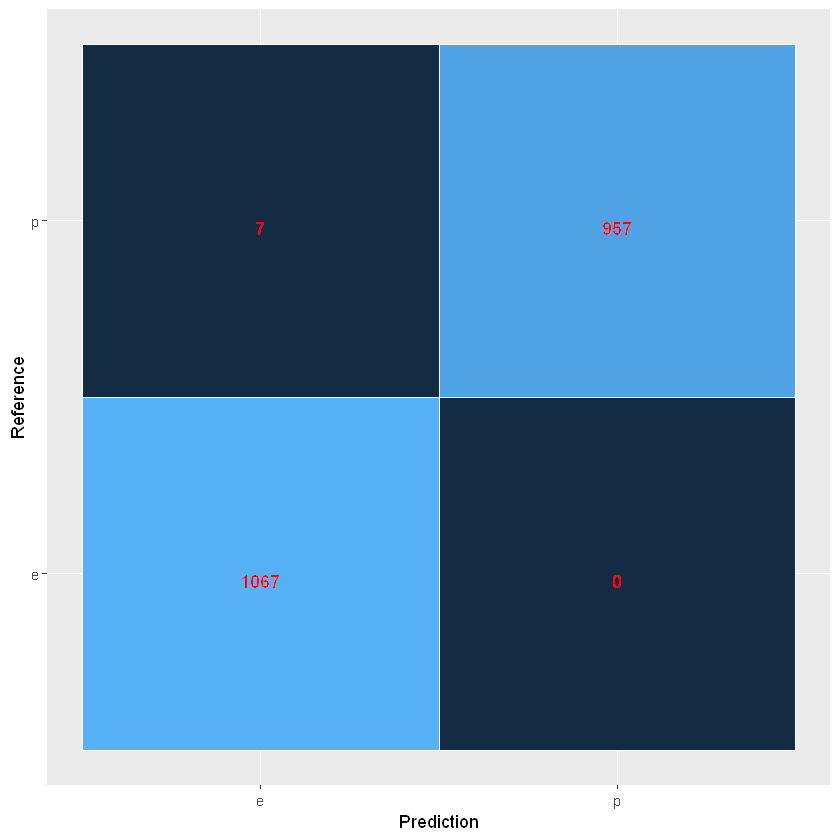

In [31]:
c <- data.frame(c$table)

library(ggplot2)
ggplot(data =  c, mapping = aes(x = Prediction, y = Reference)) +
  geom_tile(aes(fill = c$Freq), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", c$Freq)), vjust = 1,col="red") +
  theme(legend.position = "none")

## Classification using Random Forest

In [32]:
library(partykit)
model2 <- cforest(class ~. , data=train)

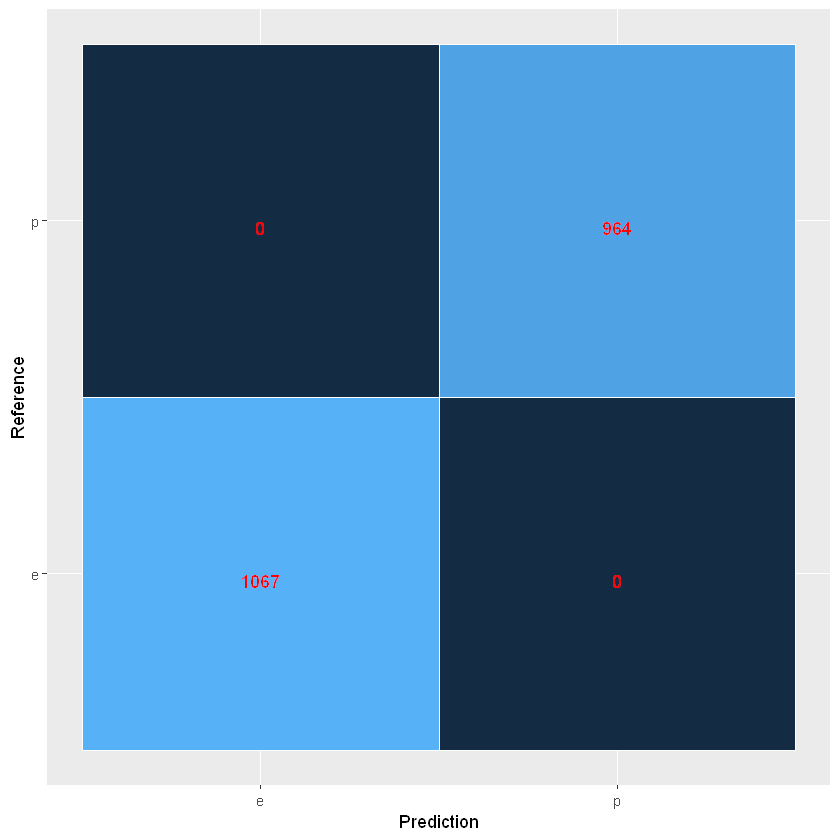

In [33]:
p <- predict(model2,newdata = test)
c <- confusionMatrix(p,v)
c <- data.frame(c$table)

ggplot(data =  c, mapping = aes(x = Prediction, y = Reference)) +
  geom_tile(aes(fill = c$Freq), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", c$Freq)), vjust = 1,col="red") +
  theme(legend.position = "none")

## Converting column factor levels into numbers

In [34]:
train$cap.shape<-as.numeric(train$cap.shape)
train$cap.surface<-as.numeric(train$cap.surface)
train$cap.color<-as.numeric(train$cap.color)
train$bruises<-as.numeric(train$bruises)
train$odor<-as.numeric(train$odor)
train$gill.attachment<-as.numeric(train$gill.attachment)
train$gill.spacing<-as.numeric(train$gill.spacing)
train$gill.size<-as.numeric(train$gill.size)
train$gill.color<-as.numeric(train$gill.color)
train$stalk.shape<-as.numeric(train$stalk.shape)
train$stalk.root<-as.numeric(train$stalk.root)
train$stalk.surface.above.ring<-as.numeric(train$stalk.surface.above.ring)
train$stalk.surface.below.ring<-as.numeric(train$stalk.surface.below.ring)
train$stalk.color.above.ring<-as.numeric(train$stalk.color.above.ring)
train$stalk.color.below.ring<-as.numeric(train$stalk.color.below.ring)
train$veil.color<-as.numeric(train$veil.color)
train$ring.number<-as.numeric(train$ring.number)
train$ring.type<-as.numeric(train$ring.type)
train$spore.print.color<-as.numeric(train$spore.print.color)
train$population<-as.numeric(train$population)
train$habitat<-as.numeric(train$habitat)


test$cap.shape<-as.numeric(test$cap.shape)
test$cap.surface<-as.numeric(test$cap.surface)
test$cap.color<-as.numeric(test$cap.color)
test$bruises<-as.numeric(test$bruises)
test$odor<-as.numeric(test$odor)
test$gill.attachment<-as.numeric(test$gill.attachment)
test$gill.spacing<-as.numeric(test$gill.spacing)
test$gill.size<-as.numeric(test$gill.size)
test$gill.color<-as.numeric(test$gill.color)
test$stalk.shape<-as.numeric(test$stalk.shape)
test$stalk.root<-as.numeric(test$stalk.root)
test$stalk.surface.above.ring<-as.numeric(test$stalk.surface.above.ring)
test$stalk.surface.below.ring<-as.numeric(test$stalk.surface.below.ring)
test$stalk.color.above.ring<-as.numeric(test$stalk.color.above.ring)
test$stalk.color.below.ring<-as.numeric(test$stalk.color.below.ring)
test$veil.color<-as.numeric(test$veil.color)
test$ring.number<-as.numeric(test$ring.number)
test$ring.type<-as.numeric(test$ring.type)
test$spore.print.color<-as.numeric(test$spore.print.color)
test$population<-as.numeric(test$population)
test$habitat<-as.numeric(test$habitat)

## **Classification using Linear Discriminant Analysis**

In [43]:
library(MASS)
model3 <- lda(class ~ ., data=train)
model3

Call:
lda(class ~ ., data = train)

Prior probabilities of groups:
        e         p 
0.5155096 0.4844904 

Group means:
  cap.shape cap.surface cap.color  bruises     odor gill.attachment
e  4.263929    2.636422  5.618593 1.650430 5.332060        1.952245
p  4.444783    3.049119  5.433266 1.164295 4.953591        1.996612
  gill.spacing gill.size gill.color stalk.shape stalk.root
e     1.287170  1.068450   7.600446    1.609997   2.495065
p     1.028794  1.571477   3.882453    1.513550   1.701220
  stalk.surface.above.ring stalk.surface.below.ring stalk.color.above.ring
e                 2.771729                 2.792423               7.092327
p                 2.361111                 2.397696               6.524051
  stalk.color.below.ring veil.color ring.number ring.type spore.print.color
e               7.078637   2.929004    2.130213  3.980898          4.217447
p               6.524729   3.001694    2.008469  2.539634          5.000000
  population  habitat
e   4.270296 2.181471

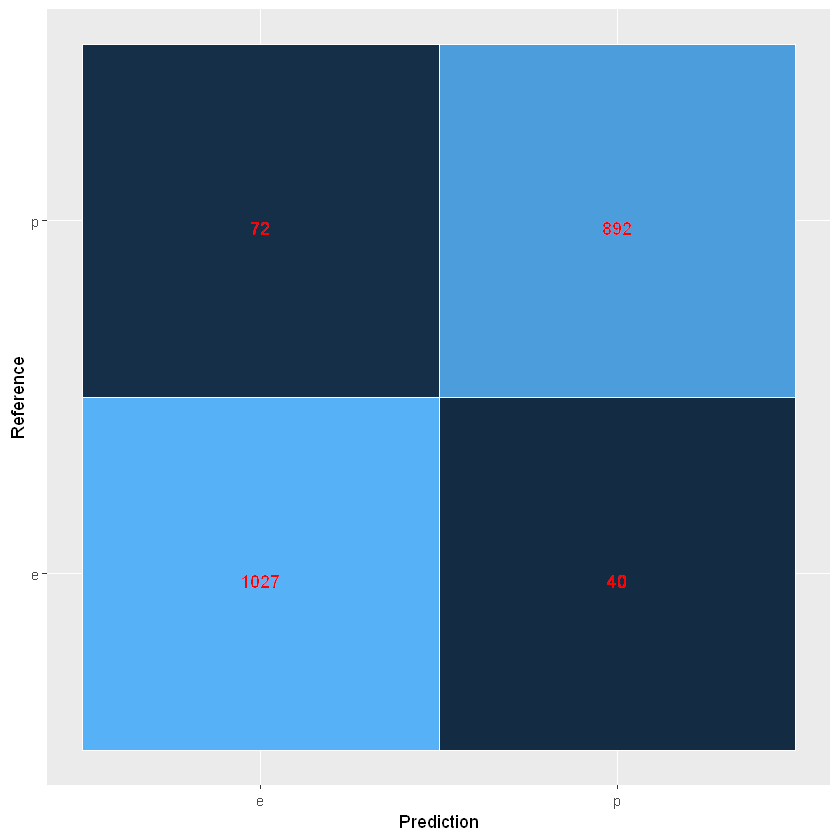

In [40]:
p <- predict(model3,newdata = test)
c <- confusionMatrix(p$class,v)
c <- data.frame(c$table)

ggplot(data =  c, mapping = aes(x = Prediction, y = Reference)) +
  geom_tile(aes(fill = c$Freq), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", c$Freq)), vjust = 1,col="red") +
  theme(legend.position = "none")

## **Classification using K Nearest Neighbor**

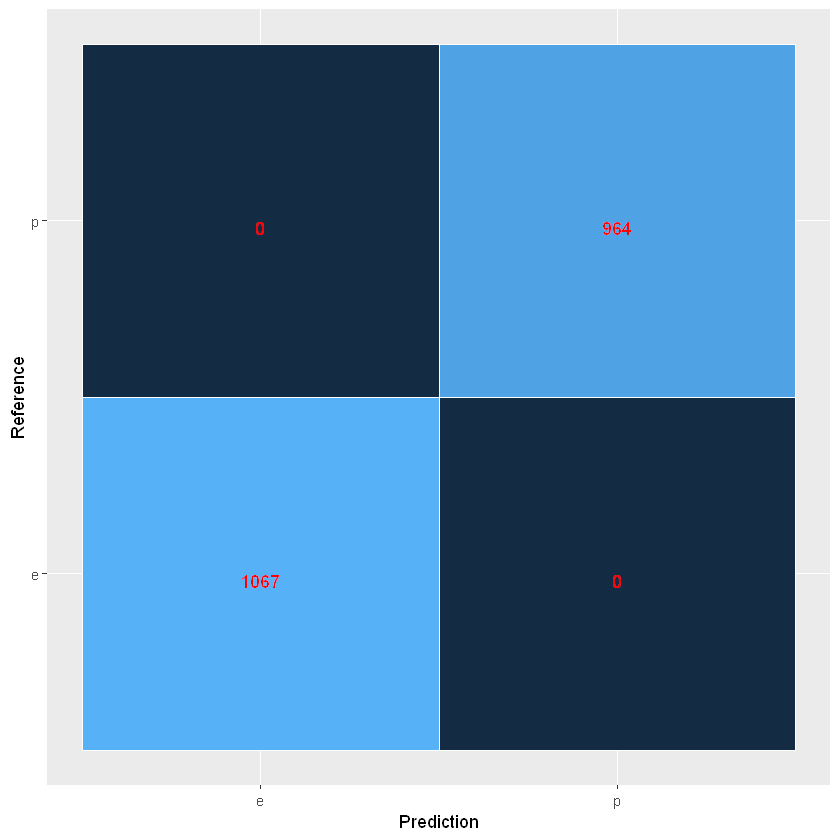

In [47]:
library(DMwR)
p <- kNN(class ~ ., train,test,k=2)
c <- confusionMatrix(p,v)
c <- data.frame(c$table)

ggplot(data =  c, mapping = aes(x = Prediction, y = Reference)) +
  geom_tile(aes(fill = c$Freq), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", c$Freq)), vjust = 1,col="red") +
  theme(legend.position = "none")